In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv('C:\\Users\\etiem\\Downloads\\archive (1)\\youtube.csv')

In [3]:
df.head(100)

,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,e4FApt6z55c,17.14.11,Kimbra - Top of the World (Official Music Video),kimbramusic,10,10/11/2017,15:00 to 15:59,Friday,US,"Kimbra|""Top of the World""""|""""Pop""""|""""Primal He...",165698,8599,361,930,False,False,False
96,96,2XK4omx9uMU,17.14.11,Camila Cabello COMPLETELY NAILS 'Finish The Ly...,Capital FM,10,10/11/2017,14:00 to 14:59,Friday,US,"capitalfmofficial|""capital""""|""""capital fm""""|""""...",836544,40195,373,976,False,False,False
97,97,xfmipNU4Odc,17.14.11,Edna's registered owner thought she was dead f...,Hope For Paws - Official Rescue Channel,15,10/11/2017,18:00 to 18:59,Friday,US,[none],284666,16396,81,949,False,False,False
98,98,jp9hK-jY6yY,17.14.11,When Someone Has A Crush on You | Lilly Singh,IISuperwomanII,23,09/11/2017,22:00 to 22:59,Thursday,US,"iisuperwomanii|""iisuperwomenii""""|""""superwoman""...",3371669,202676,3394,20086,False,False,False


In [4]:
df.shape

(161470, 18)

In [5]:
# Showing all Columns and its respectively Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 161469
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   index                   161470 non-null  int64 
 1   video_id                161470 non-null  object
 2   trending_date           161470 non-null  object
 3   title                   161470 non-null  object
 4   channel_title           161470 non-null  object
 5   category_id             161470 non-null  int64 
 6   publish_date            161470 non-null  object
 7   time_frame              161470 non-null  object
 8   published_day_of_week   161470 non-null  object
 9   publish_country         161470 non-null  object
 10  tags                    161470 non-null  object
 11  views                   161470 non-null  int64 
 12  likes                   161470 non-null  int64 
 13  dislikes                161470 non-null  int64 
 14  comment_count           161470 non-n

## Cleaning

In [6]:
# Dropping all columns where all values are Null
df = df.dropna(axis=1, how='all')

# Check the resulting DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 161469
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   index                   161470 non-null  int64 
 1   video_id                161470 non-null  object
 2   trending_date           161470 non-null  object
 3   title                   161470 non-null  object
 4   channel_title           161470 non-null  object
 5   category_id             161470 non-null  int64 
 6   publish_date            161470 non-null  object
 7   time_frame              161470 non-null  object
 8   published_day_of_week   161470 non-null  object
 9   publish_country         161470 non-null  object
 10  tags                    161470 non-null  object
 11  views                   161470 non-null  int64 
 12  likes                   161470 non-null  int64 
 13  dislikes                161470 non-null  int64 
 14  comment_count           161470 non-n

In [7]:
# Checking for more nulls
df.isnull().sum()

index                     0
video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_date              0
time_frame                0
published_day_of_week     0
publish_country           0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

This dataset shows a lack of null values which will help us working with it better.

In [8]:
df.describe()

,index,category_id,views,likes,dislikes,comment_count
count,161470.00000,161470.000000,1.614700e+05,1.614700e+05,1.614700e+05,1.614700e+05
mean,80734.50000,19.461151,2.419854e+06,6.566194e+04,3.490153e+03,7.035494e+03
std,46612.51832,7.432001,1.043749e+07,2.260617e+05,3.114779e+04,3.404121e+04
min,0.00000,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,40367.25000,15.000000,1.015382e+05,1.975000e+03,8.500000e+01,2.790000e+02
50%,80734.50000,23.000000,3.847395e+05,9.840000e+03,3.480000e+02,1.144000e+03
75%,121101.75000,24.000000,1.339528e+06,4.006275e+04,1.350000e+03,4.144750e+03
max,161469.00000,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


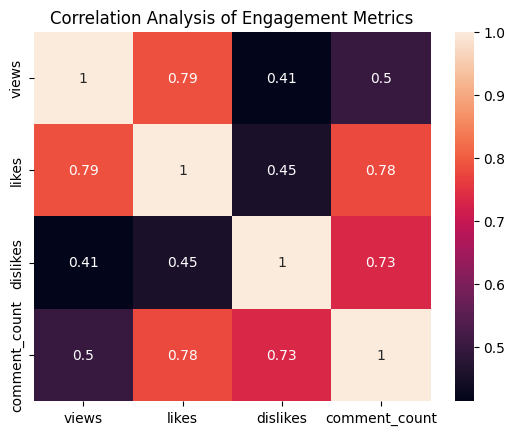

In [9]:
# Correlation analysis
correlation_matrix = df[['views', 'likes', 'dislikes', 'comment_count']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Analysis of Engagement Metrics")
plt.show()

From this we can notice three major things
Firstly, there is a high correlation between view and likes meaning there when a video has a high number of viewership it will also have a high number of likes. 
There is also a high correlation between likes and comment_count suggesting that videos with high likes tends to also have an active comment section. This suggests that the overall popularity of a video, as indicated by its view count, is closely linked to high likes count and large number of comments.
Finally, there is also a high correlation dislikes and comment_count, this could mean that videos with high number of disliked tend to have an active comment section, this could be users expressing their own opinion about the content.
In summary, this heatmap shows the different viewer response and engagement to a video.

## Analysis and Feature Engineering

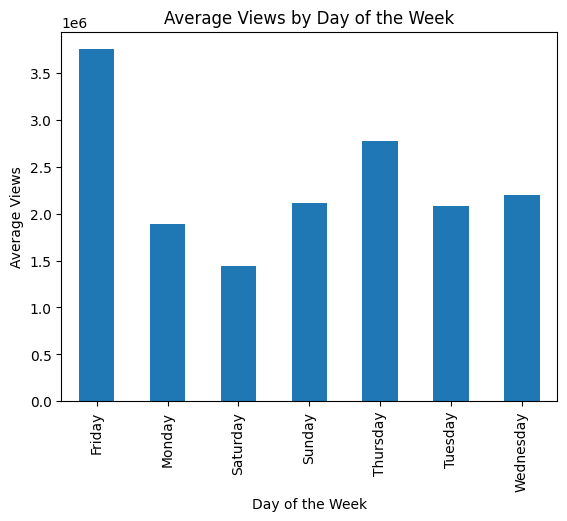

In [10]:
# Calculate average views per day of the week
average_views_per_day_of_week = df.groupby('published_day_of_week')['views'].mean()

# Analysis by day of the week
df.groupby('published_day_of_week')['views'].mean().plot(kind='bar')
plt.title("Average Views by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Views")
plt.show()

this graph shows that fridays have the highest viewership on youtube with an average view of above 3.5 million

In [11]:
# Split the tags, explode them into separate rows, and count occurrences
tag_counts = df['tags'].str.split('|').explode().value_counts()

# Get the top 10 most common tags
top_10_tags = tag_counts.head(10)

print(top_10_tags)


tags
[none]         11234
"funny"         6528
"comedy"        4968
"2018"          3806
""funny""       3406
"music"         2986
""comedy""      2740
"video"         2722
"interview"     2387
"news"          2310
Name: count, dtype: int64


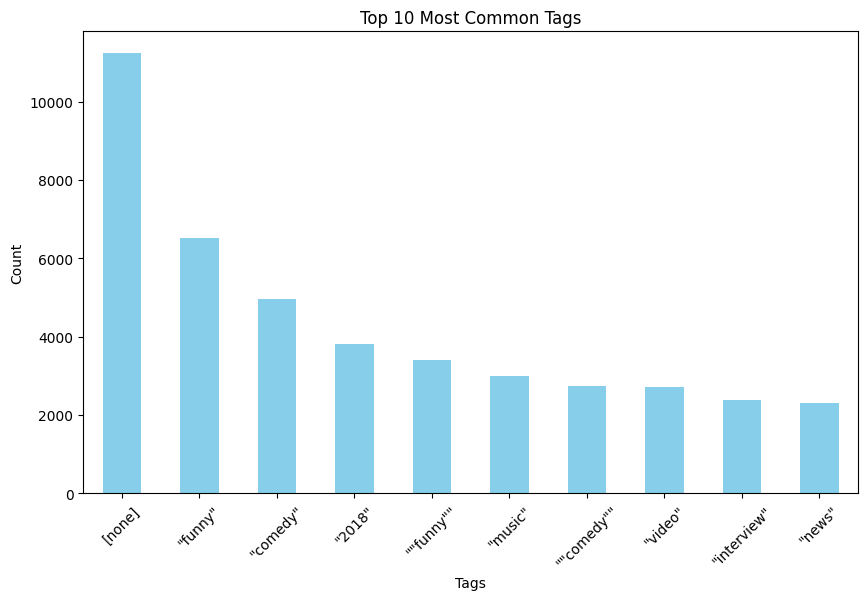

In [12]:
plt.figure(figsize=(10, 6))
top_10_tags.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Tags')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

while we have a lot of videos with no tags, videos with funny and comedy tend to have high viewership indicating people interest in amusing videos. Videos with the tag news have the lowest viewer indicating that people usually dont come to Youtube to be educated.

In [13]:
# Convert 'trending_date' to datetime format
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

# Sort videos by 'views'
sorted_videos = df.sort_values(by='views', ascending=False)

# Select the top videos (you can define how many top videos to consider)
top_videos = sorted_videos.drop_duplicates(subset=['video_id']).head(50)

# Calculate the duration of trending for each top video
top_videos['trending_duration'] = top_videos.groupby('video_id')['trending_date'].transform(lambda x: x.max() - x.min())

# Include relevant information
top_videos_info = top_videos[['video_id', 'title', 'channel_title', 'category_id', 'trending_duration']]

# Display the results
print(top_videos_info)

          video_id                                              title  \
69361  _I_D_8Z4sJE  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...   
75409  9jI-z9QN6g8  Te Bote Remix - Casper, Nio GarcÃ­a, Darell, N...   
66494  kLpH1nSLJSs               Bad Bunny - Amorfoda | Video Oficial   
62111  wfWkmURBNv8           Ozuna x Romeo Santos - El Farsante Remix   
79350  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
66885  xpVfcZ0ZcFM                               Drake - Godâ€™s Plan   
76669  ffxKSjUwKdU               Ariana Grande - No Tears Left To Cry   
76672  zEf423kYfqk  Becky G, Natti Natasha - Sin Pijama (Official ...   
49138  FlsCjmMhFmw  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
59124  sGIm0-dQd8M                Dura - Daddy Yankee (Video Oficial)   
44536  TyHvyGVs42U         Luis Fonsi, Demi Lovato - Ã‰chame La Culpa   
43743  2Vv-BfVoq4g        Ed Sheeran - Perfect (Official Music Video)   
75565  M4ZoCHID9GI     The Weeknd - Call Out My Nam

Which top 4 of trending videos being music videos this shows that viewership tend to be high for popular artist music channels. The trending during showing 0 days must mean that either the videos were trending within a day or this dataset does not fully capture the duration of videos trending status.
This also shows that music video on Youtube when released gain attention and usually ends up in top 10 trending videos on youtube.

C:\Users\etiem\AppData\Local\Temp\ipykernel_15176\2097842594.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_analysis, x='publish_country', y='views', palette='tab10')
C:\Users\etiem\AppData\Local\Temp\ipykernel_15176\2097842594.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_analysis, x='publish_country', y='likes', palette='tab10')
C:\Users\etiem\AppData\Local\Temp\ipykernel_15176\2097842594.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_analysis, x='publish_country', y='dislikes', pale

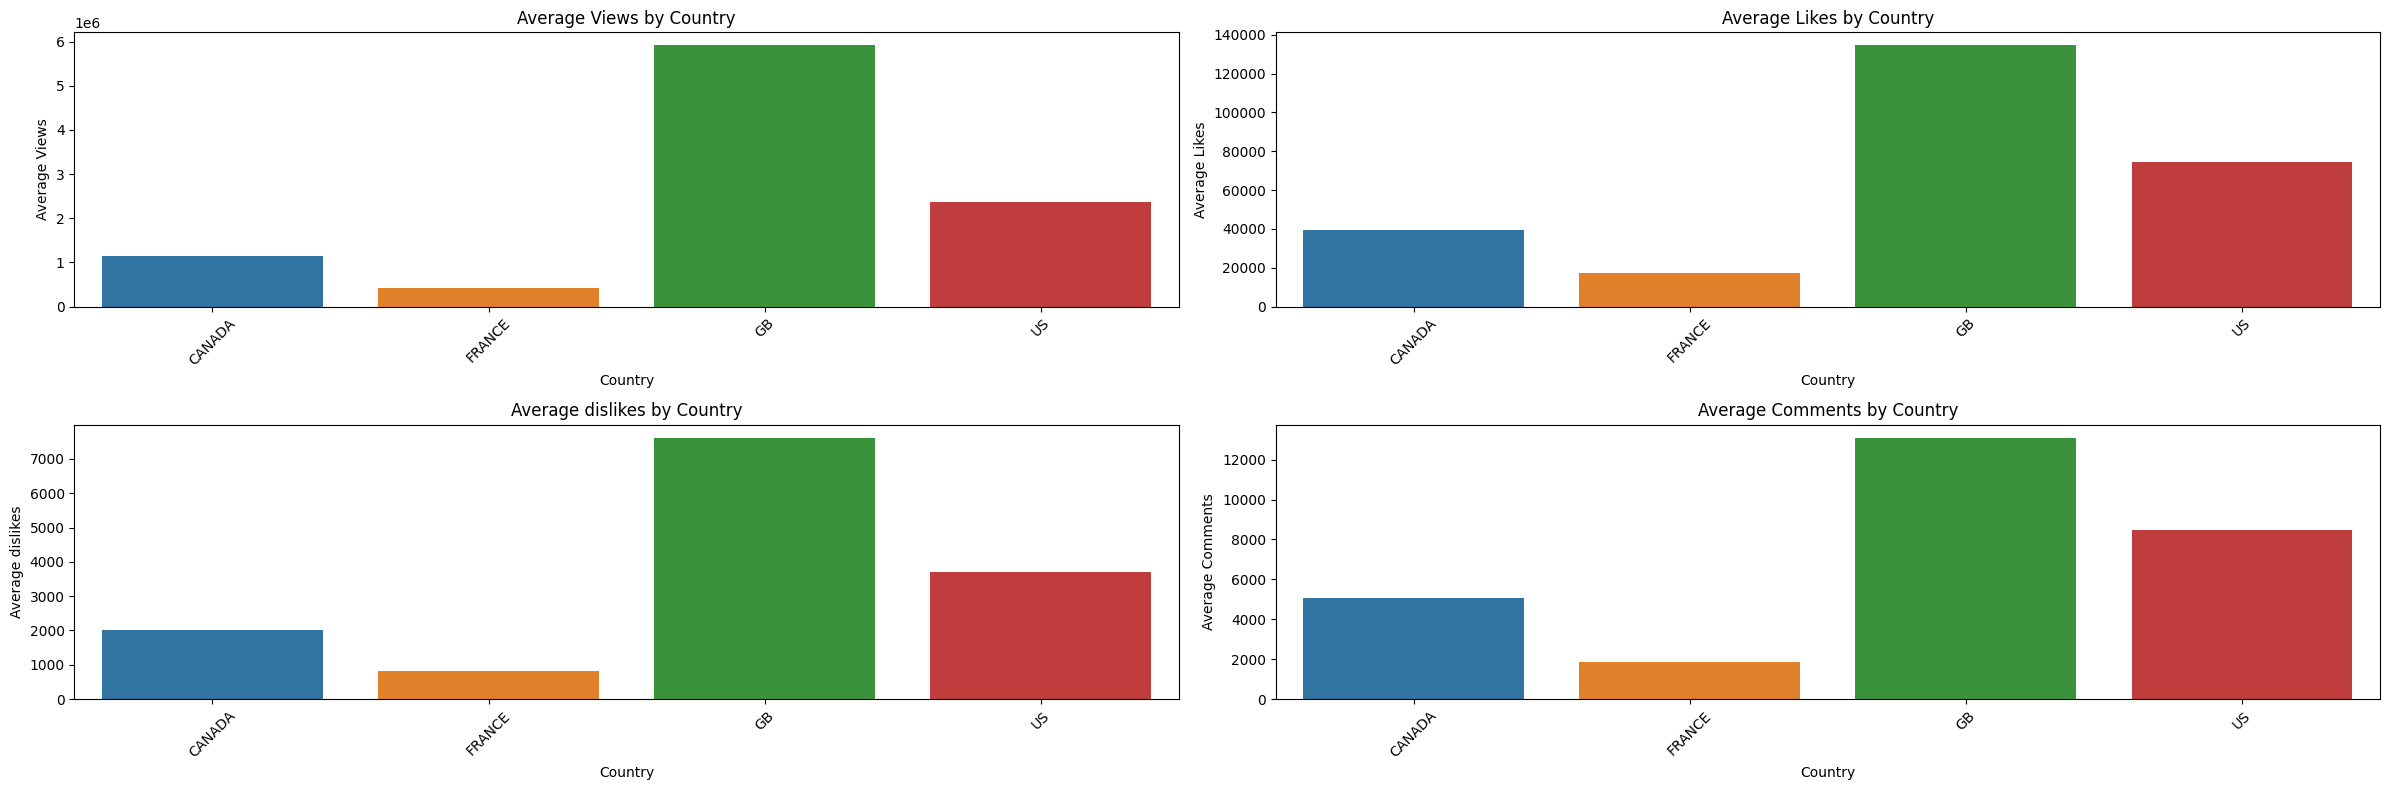

In [14]:
# Grouping data by publish_country and calculating the average views, likes, and comments
country_analysis = df.groupby('publish_country')[['views', 'likes', 'dislikes', 'comment_count']].mean().reset_index()

# Setting up the matplotlib figure
plt.figure(figsize=(24, 8))

# Plotting average views by country
plt.subplot(2, 2, 1)
sns.barplot(data=country_analysis, x='publish_country', y='views', palette='tab10')
plt.title('Average Views by Country')
plt.xlabel('Country')
plt.ylabel('Average Views')
plt.xticks(rotation=45)

# Plotting average likes by country
plt.subplot(2, 2, 2)
sns.barplot(data=country_analysis, x='publish_country', y='likes', palette='tab10')
plt.title('Average Likes by Country')
plt.xlabel('Country')
plt.ylabel('Average Likes')
plt.xticks(rotation=45)

# Plotting average dislikes by country
plt.subplot(2, 2, 3)
sns.barplot(data=country_analysis, x='publish_country', y='dislikes', palette='tab10')
plt.title('Average dislikes by Country')
plt.xlabel('Country')
plt.ylabel('Average dislikes')
plt.xticks(rotation=45)

# Plotting average comments by country
plt.subplot(2, 2, 4)
sns.barplot(data=country_analysis, x='publish_country', y='comment_count', palette='tab10')
plt.title('Average Comments by Country')
plt.xlabel('Country')
plt.ylabel('Average Comments')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Great Britain (not to be confused with England) has the highest average view, likes, dislikes and comments among France, Canada and US. This means videos that are released in GB tends to get more engagement due to the larger audience.

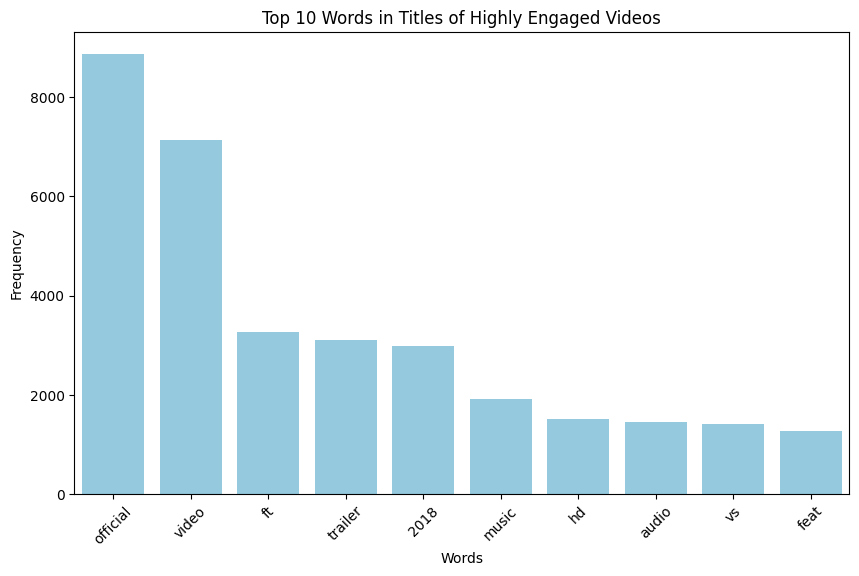

In [15]:
# Combine views, likes, and comments into a single engagement index
df['engagement_score'] = df[['views', 'likes', 'comment_count']].sum(axis=1)

# Select videos with high engagement
high_engagement_threshold = df['engagement_score'].quantile(0.75)
high_engagement_data = df[df['engagement_score'] >= high_engagement_threshold]

# Extract words from titles
vectorizer = CountVectorizer(stop_words='english', max_features=50)
title_matrix = vectorizer.fit_transform(high_engagement_data['title'])
word_counts = title_matrix.sum(axis=0).A1
title_words = vectorizer.get_feature_names_out()

# Create a DataFrame for word counts
word_count_df = pd.DataFrame({'word': title_words, 'count': word_counts})
word_count_df = word_count_df.sort_values(by='count', ascending=False).head(10)

# Plot the top words
plt.figure(figsize=(10, 6))
sns.barplot(data=word_count_df, x='word', y='count', color='skyblue')
plt.title('Top 10 Words in Titles of Highly Engaged Videos')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

videos with the word official tend to be highly engaged this could be official movie trailer or official music video.

In [16]:
top_channels_views = df.groupby('channel_title')['views'].sum().sort_values(ascending = False).head(10)

top_channels_likes = df.groupby('channel_title')['likes'].sum().sort_values(ascending=False).head(10)

top_channels_comments = df.groupby('channel_title')['comment_count'].sum().sort_values(ascending=False).head(10)


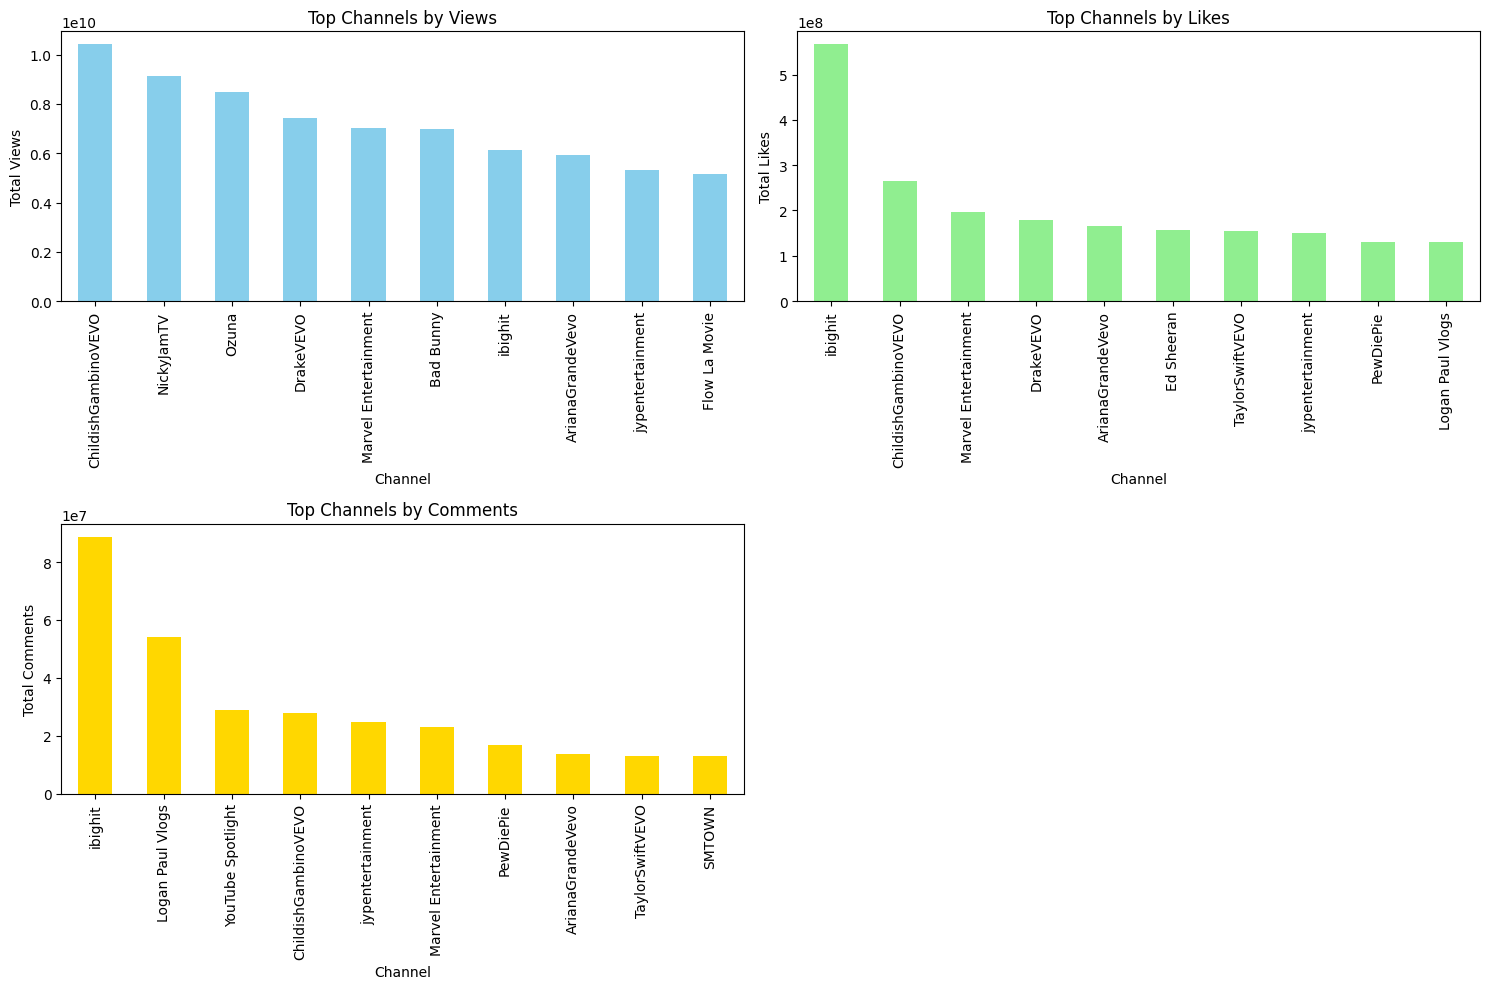

In [17]:
#Plotting graph
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
top_channels_views.plot(kind = 'bar', color = 'skyblue')
plt.title('Top Channels by Views')
plt.xlabel('Channel')
plt.ylabel('Total Views')

# Top Channels by Likes
plt.subplot(2, 2, 2)
top_channels_likes.plot(kind='bar', color='lightgreen')
plt.title('Top Channels by Likes')
plt.xlabel('Channel')
plt.ylabel('Total Likes')

# Top Channels by Comments
plt.subplot(2, 2, 3)
top_channels_comments.plot(kind='bar', color='gold')
plt.title('Top Channels by Comments')
plt.xlabel('Channel')
plt.ylabel('Total Comments')

plt.tight_layout()
plt.show()

ibighit(which i had to google what it was) is a K-pop music industry for groups such as BTS. This shows that music channels tends to have high engagement among their viewers. omg ibighit is Big hit (mind-blown).

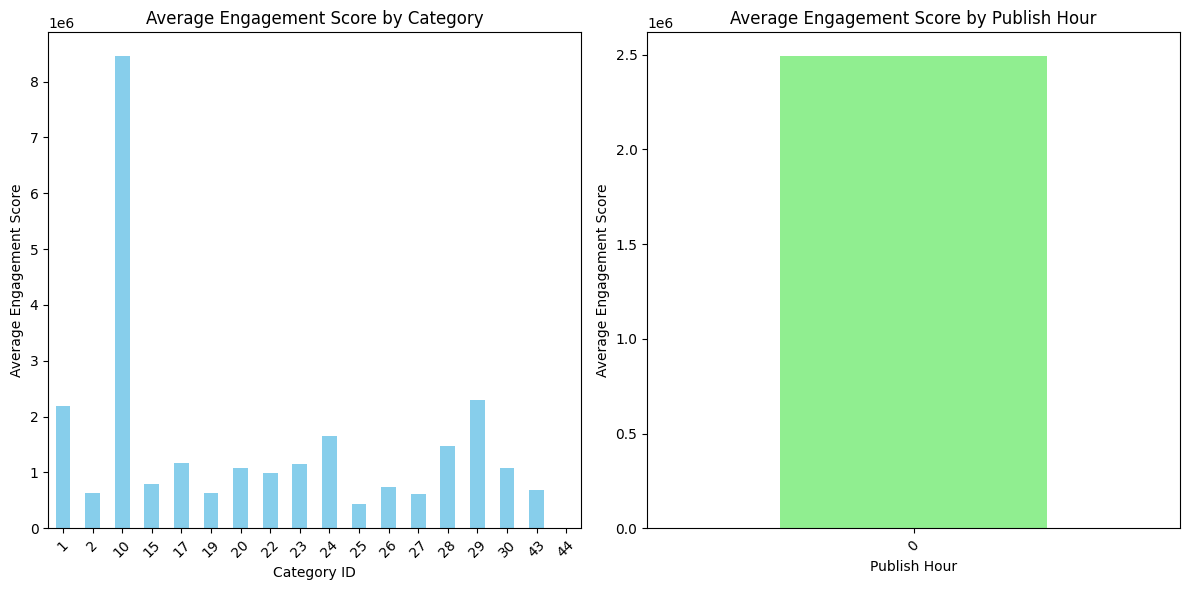

In [18]:
# Correctly parsing the 'publish_date' with the appropriate format
df['publish_date'] = pd.to_datetime(df['publish_date'], dayfirst=True)
df['publish_hour'] = df['publish_date'].dt.hour

# Creating an engagement score
df['engagement_score'] = df[['views', 'likes', 'comment_count']].sum(axis=1)

# Analyzing average engagement score by category and publish hour
category_engagement = df.groupby('category_id')['engagement_score'].mean()
hour_engagement = df.groupby('publish_hour')['engagement_score'].mean()

# Plotting average engagement score by publish hour
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
category_engagement.plot(kind='bar', color='skyblue')
plt.title('Average Engagement Score by Category')
plt.xlabel('Category ID')
plt.ylabel('Average Engagement Score')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
hour_engagement.plot(kind='bar', color='lightgreen')
plt.title('Average Engagement Score by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Average Engagement Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Average Engagement score by category: The average engagement scores vary significantly across different categories and are mostly even among each other.However Category 10, likely representing 'Music', shows the highest average engagement score of about 8.46 million, highlighting its popularity on YouTube.

## Modelling

In [19]:
# Correctly parsing the 'publish_date' with the appropriate format
df['publish_date'] = pd.to_datetime(df['publish_date'], dayfirst=True)
df['day_of_week'] = df['publish_date'].dt.day_name()

In [20]:
# Creating a binary target variable for high engagement (e.g., top 25% engagement score)
engagement_threshold = df['views'].quantile(0.75)
df['high_engagement'] = (df['views'] >= engagement_threshold).astype(int)

In [21]:
# Encoding categorical variables (like 'tags' and 'category_id')
label_encoder = LabelEncoder()
df['tags_encoded'] = label_encoder.fit_transform(df['tags'].astype(str))  # Ensuring 'tags' are strings
df['category_id_encoded'] = label_encoder.fit_transform(df['category_id'].astype(str))  # Ensuring 'category_id' are strings

In [22]:
# Selecting relevant features for the model
features = df[['tags_encoded', 'category_id_encoded']]
target = df['high_engagement']

In [23]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Building the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [25]:
# Predicting and evaluating the model
predictions = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy}')

# Printing the classification report for more detailed evaluation
print(classification_report(y_test, predictions))

Model Accuracy: 0.7505212526578725
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     36356
           1       0.00      0.00      0.00     12085

    accuracy                           0.75     48441
   macro avg       0.38      0.50      0.43     48441
weighted avg       0.56      0.75      0.64     48441



C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

This predictive model, built using logistic regression, serves as a tool to forecast the likelihood of videos achieving high engagement on YouTube. The model's inputs include encoded versions of the 'tags' and 'category_id' variables from the "YouTube Trending Videos" dataset. These features were chosen based on the hypothesis that the content category and associated tags play a significant role in determining a video's popularity and engagement level.

The 'tags' variable, which represents keywords associated with each video, offers insights into the content and themes of the video. The 'category_id' provides a more general classification of the video's content. Both these variables were encoded into numerical formats suitable for the model using label encoding, a standard technique for converting categorical data into a machine-readable form.

The model used here was logistic regression. The inputs include encoded versions of the 'tags' and 'category_id' variables. These features were chosen based on the reasoning that content category i.e music and associated tags play a significant role in determing a video popularity.

In [26]:
# Correctly parsing the 'publish_date' with the appropriate format
df['publish_date'] = pd.to_datetime(df['publish_date'], dayfirst=True)
df['day_of_week'] = df['publish_date'].dt.day_name()

In [27]:
# Creating a binary target variable for high engagement (e.g., top 25% engagement score)
engagement_threshold = df['views'].quantile(0.75)
df['high_engagement'] = (df['views'] >= engagement_threshold).astype(int)

# Calculating average views by day of the week
avg_views_by_day = df.groupby('day_of_week')['views'].mean().to_dict()

# Mapping the average views back to the DataFrame
df['avg_views_by_day'] = df['day_of_week'].map(avg_views_by_day)

In [28]:
# Encoding categorical variables (like 'tags' and 'category_id')
label_encoder = LabelEncoder()
df['tags_encoded'] = label_encoder.fit_transform(df['tags'].astype(str))  # Ensuring 'tags' are strings
df['category_id_encoded'] = label_encoder.fit_transform(df['category_id'].astype(str))  # Ensuring 'category_id' are strings

# Selecting relevant features for the model
features = df[['tags_encoded', 'category_id_encoded', 'avg_views_by_day']]
target = df['high_engagement']

In [29]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [30]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Building the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [32]:
# Predicting and evaluating the model
predictions = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy}')

# Printing the classification report for more detailed evaluation
print(classification_report(y_test, predictions))

Model Accuracy: 0.7495097128465557
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     36356
           1       0.18      0.00      0.00     12085

    accuracy                           0.75     48441
   macro avg       0.47      0.50      0.43     48441
weighted avg       0.61      0.75      0.64     48441



i also tried a model adding day of the week as another X variable to see if the model will perform better, since day of the week looked to also be a major determinant of a video popularity.

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is your DataFrame and it contains columns 'publish_date', 'views', 'tags', 'category_id'

# Correctly parsing the 'publish_date' with the appropriate format
df['publish_date'] = pd.to_datetime(df['publish_date'], dayfirst=True)
df['day_of_week'] = df['publish_date'].dt.day_name()

# Creating a binary target variable for high engagement (e.g., top 25% engagement score)
engagement_threshold = df['views'].quantile(0.75)
df['high_engagement'] = (df['views'] >= engagement_threshold).astype(int)

# Encoding categorical variables (like 'tags' and 'category_id')
label_encoder = LabelEncoder()
df['tags_encoded'] = label_encoder.fit_transform(df['tags'].astype(str))  # Ensuring 'tags' are strings
df['category_id_encoded'] = label_encoder.fit_transform(df['category_id'].astype(str))  # Ensuring 'category_id' are strings

# Selecting relevant features for the model
features = df[['tags_encoded', 'category_id_encoded']]
target = df['high_engagement']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the KNN model
knn = KNeighborsClassifier()

# Defining the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Using GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Training the KNN model with the best parameters
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)

# Predicting and evaluating the model
predictions = best_knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy}')

# Printing the classification report for more detailed evaluation
print(classification_report(y_test, predictions))


Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Model Accuracy: 0.9196754815135939
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     36356
           1       0.84      0.84      0.84     12085

    accuracy                           0.92     48441
   macro avg       0.89      0.89      0.89     48441
weighted avg       0.92      0.92      0.92     48441



In [34]:
# Correctly parsing the 'publish_date' with the appropriate format
df['publish_date'] = pd.to_datetime(df['publish_date'], dayfirst=True)
df['day_of_week'] = df['publish_date'].dt.day_name()


In [35]:
# Creating a binary target variable for high engagement (e.g., top 25% engagement score)
engagement_threshold = df['views'].quantile(0.75)
df['high_engagement'] = (df['views'] >= engagement_threshold).astype(int)

In [36]:
# Encoding categorical variables (like 'tags' and 'category_id')
label_encoder = LabelEncoder()
df['tags_encoded'] = label_encoder.fit_transform(df['tags'].astype(str))  # Ensuring 'tags' are strings
df['category_id_encoded'] = label_encoder.fit_transform(df['category_id'].astype(str))  # Ensuring 'category_id' are strings

# Selecting relevant features for the model
features = df[['tags_encoded', 'category_id_encoded']]
target = df['high_engagement']

In [37]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [38]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [39]:
# Defining the parameter grid
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

In [40]:
# Using GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [3, 5, 7, 9, 11],
                         'knn__weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [41]:
# Training the KNN model with the best parameters
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=7,
                                      weights='distance'))])

In [42]:
# Predicting and evaluating the model
predictions = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.9196754815135939


In [43]:
# Printing the classification report for more detailed evaluation
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     36356
           1       0.84      0.84      0.84     12085

    accuracy                           0.92     48441
   macro avg       0.89      0.89      0.89     48441
weighted avg       0.92      0.92      0.92     48441



Class 0: Represents instances where the engagement is not high (i.e., views are below the 75th percentile). While, Class 1: Represents instances with high engagement (i.e., views are in the top 25%). So KNN seems to be our best model with an overall accuracy of 92% (yes that is a bit high but hey those are the numbers). This model is also better at identifying and predicting class 0 with precision, recall anf f1-score of 95% while for Class 1, it is less accurate with precision, recall and f1-score of 84%.
